In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
len(x_train)

60000

In [8]:
len(x_test)

10000

In [11]:
n = 1111
y_train[n]

5

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Sandal


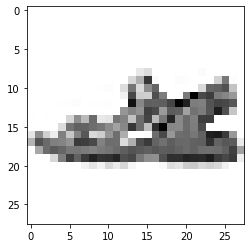

In [13]:
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys')

In [14]:
##將資料整理，reshape
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train[n]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
##打造神經網路
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [18]:
model = Sequential()

In [19]:
model.add(Dense(200, input_dim=784, activation='relu'))

In [20]:
model.add(Dense(200, activation='relu'))

In [21]:
model.add(Dense(100, activation='relu'))

In [22]:
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(loss='mse', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 218,310
Trainable params: 218,310
Non-trainable params: 0
_________________________________________________________________


In [25]:
##訓練時間
model.fit(x_train, y_train, batch_size=25, epochs=40)

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 14s 232us/sample - loss: 0.0822 - accuracy: 0.4067
Epoch 2/40
60000/60000 [==============================] - 13s 222us/sample - loss: 0.0604 - accuracy: 0.6121
Epoch 3/40
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0477 - accuracy: 0.6735
Epoch 4/40
60000/60000 [==============================] - 13s 214us/sample - loss: 0.0413 - accuracy: 0.7069
Epoch 5/40
60000/60000 [==============================] - 13s 212us/sample - loss: 0.0366 - accuracy: 0.7630
Epoch 6/40
60000/60000 [==============================] - 13s 210us/sample - loss: 0.0332 - accuracy: 0.7878
Epoch 7/40
60000/60000 [==============================] - 13s 211us/sample - loss: 0.0309 - accuracy: 0.8000
Epoch 8/40
60000/60000 [==============================] - 13s 211us/sample - loss: 0.0294 - accuracy: 0.8076
Epoch 9/40
60000/60000 [==============================] - 13s 212us/sample - loss: 0.0282 - accuracy: 0.8

In [26]:
result = model.predict_classes(x_test)

神經網路預測是: Shirt


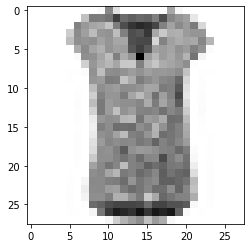

In [28]:
n = 7777
print('神經網路預測是:', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')